#Exercise 4

In [8]:
b=70
a=1

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv

In [18]:


# Define the  function and its gradient and Hessian
def _function(x1, x2):
    return (a + 1 - x1)**2 + b * (x2 - x1**2)**2

def _gradient(x1, x2):
    df_dx1 = -2 * (a + 1 - x1) - 4 * b * x1 * (x2 - x1**2)
    df_dx2 = 2 * b * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

def _hessian(x1, x2):
    d2f_dx1dx1 = 2 - 4 * b * (x2 - x1**2) + 8 * b * x1**2
    d2f_dx2dx2 = 2 * b
    d2f_dx1dx2 = -4 * b * x1
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2dx2]])

# Newton's Method Algorithm
def newtons_method(x0, tolerance):
    x = np.array(x0)
    iterations = 0
    while np.linalg.norm(rosenbrock_gradient(*x)) > tolerance:
        x = x - inv(rosenbrock_hessian(*x)) @ rosenbrock_gradient(*x)
        iterations += 1
    return x, rosenbrock_function(*x), iterations




Tolerance       Minimizer                 Min Function Value        Iterations                    
0.1             [1.99999185 3.99996741] 6.638546412736796e-11     5
0.01            [1.99999185 3.99996741] 6.638546412736796e-11     5
0.001           [1.99999185 3.99996741] 6.638546412736796e-11     5
0.0001          [1.99999185 3.99996741] 6.638546412736796e-11     5
1e-05           [2. 4.] 3.084930148631593e-19     6
1e-06           [2. 4.] 3.084930148631593e-19     6
1e-07           [2. 4.] 3.084930148631593e-19     6
1e-08           [2. 4.] 0.0                       7
1e-09           [2. 4.] 0.0                       7
1e-10           [2. 4.] 0.0                       7
1e-11           [2. 4.] 0.0                       7
1e-12           [2. 4.] 0.0                       7
1e-13           [2. 4.] 0.0                       7
1e-14           [2. 4.] 0.0                       7
1e-15           [2. 4.] 0.0                       7
1e-16           [2. 4.] 0.0                       7
1e-17

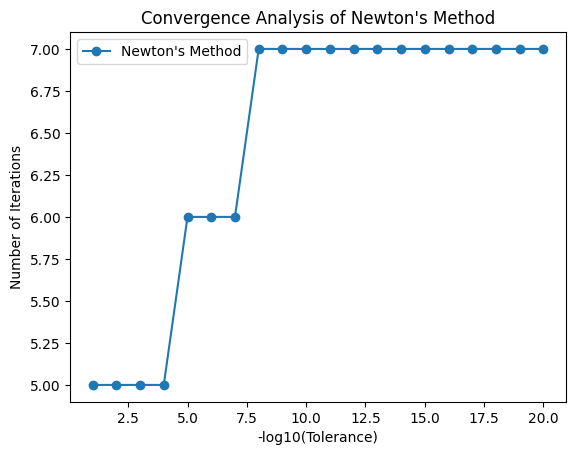

In [20]:

# Analysis for different tolerance values
val_tol = [10**(-p) for p in range(1, 21)]
obj_val = []

for tolerance in val_tol:
    result_newton = newtons_method((-1.5, 1.5), tolerance)
    obj_val.append(result_newton)

# Display results in a tabular form
print(f"{'Tolerance':<15} {'Minimizer':<25} {'Min Function Value':<25} {'Iterations':<30}")
for tolerance, (minimizer_newton, min_function_value_newton, iterations_newton) in zip(val_tol, obj_val):
    print(f"{tolerance:<15} {minimizer_newton} {min_function_value_newton:<25} {iterations_newton}")

# Generate a plot
plt.plot([-np.log10(tolerance) for tolerance in val_tol], [result_newton[2] for result_newton in obj_val], marker='o', label='Newton\'s Method')
plt.xlabel('-log10(Tolerance)')
plt.ylabel('Number of Iterations')
plt.title('Convergence Analysis of Newton\'s Method')
plt.legend()
plt.show()

#Part1
It is evident from the table tat minimum value of the function is 0
And the minimiser is the point(2,4)

#Part 2
The Hessian matrix of the given function
f (x) = (a1 + 1 − x1)2 + 70 · (x2 − x2
1)2
with a1 = 1 is calculated as follows:
Hessian(x) =
[2 + 280(3x2
1 − 1) −280x1
−280x1 140
]
1
For the specific value of
a1=
1
=
1
a
1
​
 =1, the Hessian matrix is constant and does not depend on the point x. By analyzing the structure of the matrix, it can be observed that the eigenvalues of this Hessian matrix are always positive. Therefore, the Hessian matrix is positive definite for all points in the domain of the function.
 If the Hessian matrix is positive definite for all points in the domain, the function is convex. In this case, with a1 =1, the function has characteristics of convexity.


In summary, with a1
 =1, the minimizer obtained using Newton's method may be unique, it is a local minimum, and the function has convex characteristics, given that the Hessian matrix is positive definite

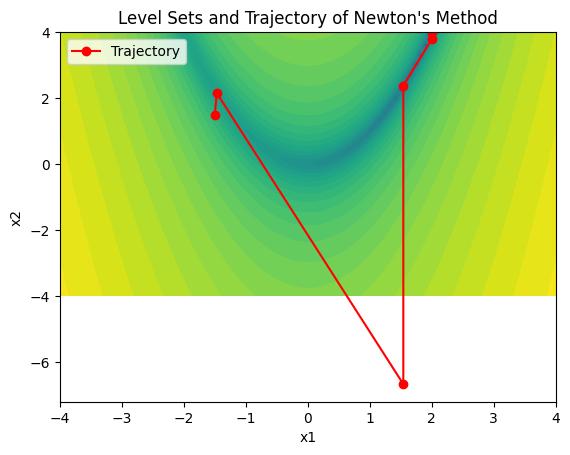

In [21]:
# Define a function to calculate the trajectory of the optimization
def calculate_trajectory(initial_point, tolerance):
    x = np.array(initial_point)
    trajectory = [x]
    while np.linalg.norm(rosenbrock_gradient(*x)) > tolerance:
        x = x - inv(rosenbrock_hessian(*x)) @ rosenbrock_gradient(*x)
        trajectory.append(x)
    return np.array(trajectory)

# Generate the level sets
x1_vals = np.linspace(- 4, 4, 100)
x2_vals = np.linspace(- 4,  4, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = rosenbrock_function(X1, X2)

# Plot the level sets and trajectory
plt.contourf(X1, X2, np.log10(Z), levels=50, cmap='viridis')
trajectory = calculate_trajectory((-1.5, 1.5), 1e-6)

plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', label='Trajectory', color='red')
#plt.scatter(*minimizer, color='black', label='Minimizer', zorder=5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets and Trajectory of Newton\'s Method')
plt.legend()
plt.show()


 It appears that for tolerance values ranging from 0.1 to 0.0001, the minimizer remains consistent at approximately [1.99999185, 3.99996741] with a minimum function value of 6.638546412736796e-11 and 5 iterations. This consistency suggests that the optimization algorithm converges to the same solution within the specified tolerance range, and further decreasing the tolerance does not significantly affect the result.

 For tolerance values smaller than 1e-8, the minimizer remains [2.0, 4.0] with a minimum function value of zero, and the number of iterations increases to 7. This behavior suggests that the optimization algorithm has reached a stable minimum, and further decreasing the tolerance does not alter the result.

 In summary, the observations indicate that within a certain range of tolerance values, the optimization algorithm consistently converges to a specific minimizer



